# Fine-Tuning Lab

Welcome to the fine-tuning lab! By the end of this lab, you will have

1. Loaded a pretrained network and ask it for predictions
2. Trained a logistic model on top of a frozen pretrained network to predict cats from dogs
3. Fine-tuned a pretrained network to predict cats from dogs
4. Performed error analysis to get insight into next steps to take

Let's get started!

---

# Pretrained Networks

In this section, we will practice using a pretrained model, in particular `VGGNet`. `VGGNet` won the 2013 [*ImageNet Large Scale Visual Recognition Challenge (ILSVRC)*](http://image-net.org/challenges/LSVRC/2013/). After loading `VGGNet`, we will have it to make predictions on our images. We will then modify it so that it is tailored to the cats vs. dogs dataset.

# Loading a Pre-Trained `VGGNet` in `keras`

![VGGNet](http://machinethink.net/images/vggnet-convolutional-neural-network-iphone/VGGNet@2x.png)

Keras provides a simple and easy way of loading in a pretrained `VGGNet` for us to play around with.

## Tasks

- Instantiate a `keras.applications.VGG16` model with `ImageNet` pretrained weights
- Use `keras.models.Model.summary()` to visualize the architecture

## Hints

- [Documentation](https://keras.io/applications/#vgg16) for `keras.applications.VGG16`
- Check out the example **Extract features with VGG16** on the `keras` [applications](https://keras.io/applications/) page for how to load a `VGG16` model with pretrained `ImageNet` weights

## Notes

- The first time you instantiate a `keras.applications.vgg16.VGG16` with ImageNet weights keras will download the weights which might take some time so be patient!

In [77]:
import keras as keras
import pickle
import numpy as np
from keras.layers import Dense, Conv2D, MaxPool2D
from keras.models import Model

In [2]:
model_vgg = keras.applications.VGG16()
model_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

## Task

- Download the file `CatsVDogs.p` and put it in an accessible directory and load the data into memory

In [40]:
[imgs, y] = pickle.load(open('data/CatsVDogs.p','rb'))

# Preprocessing Images

Even though the cats vs. dogs dataset has different labels than those found in `ImageNet`, we can still ask `VGGNet` to make predictions and output the most likely `ImageNet` classes. But before doing this, we need to perform the necessary preprocessing the VGGNet expects.

### Tasks

- Convert `imgs` to a `4D` `numpy` array and save it to a variable named `X`
- Perform the preprocessing on `X` that `VGGNet16` expects
- Display five prepocessed images

### Hints

- Use `keras.applications.vgg16.preprocess_input()` to zero-center a 4D tensor of images with respect to the mean RGB value in `ImageNet`

In [24]:
from IPython.display import display
from keras.preprocessing.image  import img_to_array, array_to_img

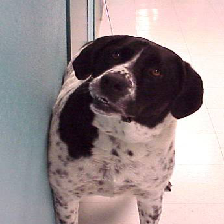

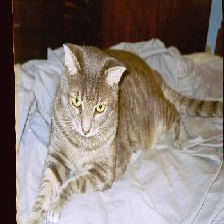

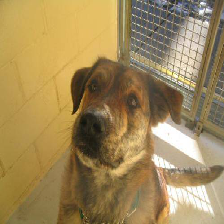

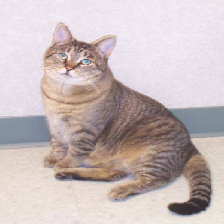

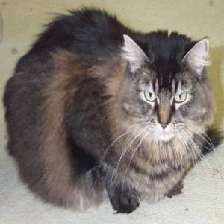

Before processing


In [49]:
[display(imgs[_]) for _ in range(5)]
print('Before processing')

In [110]:
imgs_normal = np.array([img_to_array(i) for i in imgs])

In [111]:
np.shape(imgs_normal)

(2000, 224, 224, 3)

In [66]:
imgs_tensors = np.array([img_to_array(i).reshape(1,224,224,3) for i in imgs])

In [112]:
imgs_tensors.shape

(2000, 1, 224, 224, 3)

In [48]:
imgs_preprocessed = keras.applications.vgg16.preprocess_input(imgs_tensors)

After processing


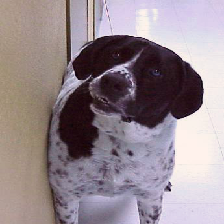

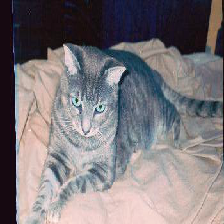

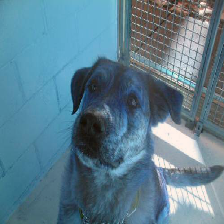

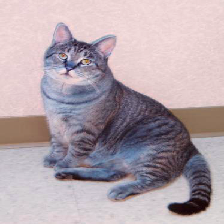

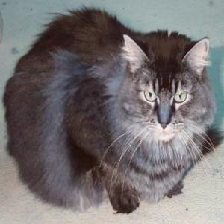

[None, None, None, None, None]

In [52]:
print('After processing')
[display(array_to_img(imgs_preprocessed[_])) for _ in range(5)]


## Question

- What does `keras.applications.vgg16.preprocess_input()` do?

## Hint

- Look at how and where [`keras.applications.vgg16.preprocess_input()`](https://github.com/fchollet/keras/blob/master/keras/applications/vgg16.py#L27) is defined

## Answer

- The color channels are shifted and then the mean pixel intensity is subtracted channel-wise.

# `VGGNet` Predictions

Let's make some predictions with our VGGNet.

## Tasks

- Use `keras.applications.vgg16.predict()` to make predictions on the first four images of `X`
- Use `keras.applications.vgg16.decode_predictions()` to recover the object class names from the `VGGNet` predictions
- Display the first four images along with `VGGNet`'s predictions

## Hints

- Look at the `keras` [applications](https://keras.io/applications/) page for an example of making predictions with `VGGNet`

#What does keras.applications.vgg16.preprocess_input() do?
- This is taking the average R, G, and B values from each channel and subtracting these numbers from each image in the dataset.https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py

In [71]:
vgg_predictions = [model_vgg.predict(i) for i in imgs_tensors[:5,:,:,:]]

In [72]:
 [keras.applications.vgg16.decode_predictions(i)  for i in vgg_predictions]

[[[('n02100236', 'German_short-haired_pointer', 0.97804445),
   ('n02088632', 'bluetick', 0.012053073),
   ('n02109047', 'Great_Dane', 0.0016208242),
   ('n02108422', 'bull_mastiff', 0.0013694956),
   ('n02102040', 'English_springer', 0.00086017646)]],
 [[('n03938244', 'pillow', 0.54987204),
   ('n02869837', 'bonnet', 0.062497228),
   ('n04033995', 'quilt', 0.059541505),
   ('n02804414', 'bassinet', 0.055336431),
   ('n03188531', 'diaper', 0.048198778)]],
 [[('n02099849', 'Chesapeake_Bay_retriever', 0.53667766),
   ('n02101388', 'Brittany_spaniel', 0.12396778),
   ('n02099712', 'Labrador_retriever', 0.069029599),
   ('n02092339', 'Weimaraner', 0.068756014),
   ('n03404251', 'fur_coat', 0.01228404)]],
 [[('n02123045', 'tabby', 0.66480082),
   ('n02124075', 'Egyptian_cat', 0.25111762),
   ('n02123159', 'tiger_cat', 0.081522688),
   ('n02127052', 'lynx', 0.00033937916),
   ('n03223299', 'doormat', 0.00032212373)]],
 [[('n02123394', 'Persian_cat', 0.47984719),
   ('n02123045', 'tabby', 0.1

We see that `VGGNet` does a fairly good job at predicting sensibly classes. However, a lot of modeling effort is wasted by predicting probabilities for 1,000 classes when all we care about are *two* classes (i.e. cat and dog). In other words, `VGGNet` is not tailored to our specific dataset.

# Training a Classifier with `VGGNet` Features

Let's tailor `VGGNet` to the cats vs. dogs dataset by treating `VGGNet` as a black-box feature extractor train a logistic classifier on top.

### Tasks

- Replace the 1000-unit Dense+Softmax layer on `keras.applications.vgg16` with a `1`-unit Dense+Sigmoid layer
- Use `keras.models.Model.summary()` to ensure that you've successfully replaced the `1,000`-way softmax layer with a dense layer followed by a sigmoid activation

### Hints

- Look at the **Fine-tune InceptionV3 on a new set of classes** example on the `keras` [applications](https://keras.io/applications/) page for an example of how to modify the final layers of a `keras.models.Model`

In [ ]:
keras.applications.vgg16()

In [73]:
model_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [84]:
model_vgg.get_layer('fc2').output

<tf.Tensor 'fc2/Relu:0' shape=(?, 4096) dtype=float32>

In [85]:
fc2 = model_vgg.get_layer('fc2').output
p = Dense(output_dim=1, activation='sigmoid', name='logit')(fc2)
model_lastlayer = Model(input=model_vgg.input, output=p)
model_lastlayer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

/Users/jonathanhilgart/anaconda/envs/dl/lib/python3.6/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", name="logit", units=1)`
  '` call to the Keras 2 API: ' + signature)
/Users/jonathanhilgart/anaconda/envs/dl/lib/python3.6/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("lo...)`
  '` call to the Keras 2 API: ' + signature)


# Freeze Base Model

We want to treat `VGGNet` as a fixed feature extractor and optimize only the weights in the final Dense layer.

## Tasks

- Set the `trainable` attribute on every `keras.layers.Layer` to `False` for every layer except the last dense layer in the `keras.models.Model`
- Print out the name of each `keras.layers.Layer` with the value of its `trainable` attribute to ensure you've been successful

## Hints

- The `keras.models.Model.layers` attribute provides access the layers in a `keras` model
- The `keras.layers.Layer.name` attribute contains the name of a layer
- `keras.layers.Layer.trainable = False` freezes that layer during training

## Reminder

- Make sure to compile your model after freezing weights for it to really take effect!

In [93]:
for i in model_lastlayer.layers:
    name = i.name
    if name !='logit':
        i.trainable = False
    else:
        print(i.name)

logit


In [94]:
for i in model_lastlayer.layers:
    print(i.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True


In [125]:
model_lastlayer.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

# Train Dense Layer on Cats vs. Dogs Dataset

It's time we learn the parameters of our newly defined dense layer on the cats vs. dogs dataset!

## Tasks

- Compile the `keras.models.Model`
- Call `keras.models.Model.fit()` with the images and labels for 1 epoch and with a `validation_split=0.1`

## Suggestions

- Kill the training after it finishes the first batch (otherwise it will take forever and our concern here is not overall accuracy but learning)

In [118]:
from keras.preprocessing.image import ImageDataGenerator

In [136]:
model_lastlayer.fit(x=imgs_preprocessed,y=y, verbose=True,epochs=1, validation_split=.1)

Train on 1800 samples, validate on 200 samples
Epoch 1/1
  64/1800 [>.............................] - ETA: 1930s - loss: 0.1319 - acc: 0.9219

KeyboardInterrupt: 

# Make Predictions

Given a new image, the `keras.models.Model` should now output a single number $p(y = \text{dog}\ |\ x)$.

## Tasks

- Use `keras.models.Model.predict()` on the first four images of `X_tf`
- Display the images along with their predictions

In [137]:
predictions = [model_lastlayer.predict(i) for i in imgs_tensors[:5,:,:,:]]

I think this is a dog


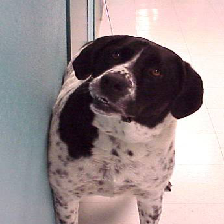

I think this is a cat!


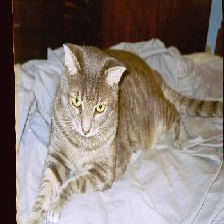

I think this is a dog


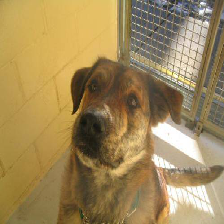

I think this is a cat!


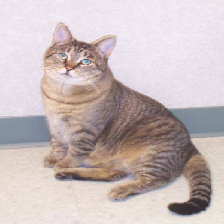

I think this is a cat!


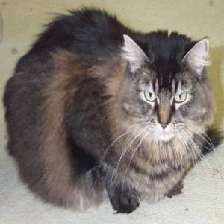

In [138]:
for predict,img in zip(predictions,imgs_normal):
    if predict <.5:
        print('I think this is a cat!')
        display(array_to_img(img))
    else:
        print("I think this is a dog")
        display(array_to_img(img))

Using `VGGNet` as a black-box feature extractor gets us respectible performance. However, we can do better by leveraging supervised *fine-tuning*, a type of *transfer learning*.

# Fine-Tuning `VGGNet` on Cats vs. Dogs Dataset

In addition to learning the final Dense+Sigmoid layer, we can also update the last few layers of `VGGNet` during training through a process called *fine-tuning*. This process is illustrated in the following figure.

![Fine-Tuning](https://blog.keras.io/img/imgclf/vgg16_modified.png)

# Set Up `VGGNet` for Fine-Tuning

## Tasks

- Unfreeze the penultimate dense layer along with the final conv block
- Print out each layer name with the value of its `trainable` attribute to ensure you've successfully unfrozen the last conv block plus the final two dense layers

## Hints

- Use `keras.models.Model.summary()` to determine the names for the last two `Dense` layers
- Use `keras.models.Model.get_layer()` to get references to these layers
- `keras.layers.Layer.trainable = True` unfreezes a `keras.layers.Layer`

In [134]:
model_lastlayer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [141]:
fc_2 = model_lastlayer.get_layer('fc2')
fc_2.trainable = True
fc_1 = model_lastlayer.get_layer('fc1')
fc_1.trainable = True
block5_pool  = model_lastlayer.get_layer('block5_pool')
block5_pool.trainable= True
block5_conv3 = model_lastlayer.get_layer('block5_conv3')
block5_conv3.trainable = True
block5_conv2 = model_lastlayer.get_layer('block5_conv2')
block5_conv2.trainable = True
block5_conv1  = model_lastlayer.get_layer('block5_conv1')
block5_conv1 .trainable = True

In [144]:
for i in model_lastlayer.layers:
    print(i.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
False
True
True
True


# Fine-Tune `VGGNet`

Now that we have unfrozen the last two `Dense` layers and the final conv block we can optimize these weights for even better performance.

## Tasks

- `keras.models.Model.compile()` the model with a stochastic gradient descent optimizer with a small learning rate (e.g. $10^{-4}$)
- `keras.models.Model.fit()` the `keras.models.Model` to the image data with a `validation_split=1` for one epoch

## Suggestions

- Kill the training after a minibatch update since it takes forever on a CPU

In [145]:
model_mediumtuning = model_lastlayer

In [146]:
from keras.optimizers import SGD

In [151]:
model_mediumtuning.compile(optimizer=SGD(lr=10e-4),loss='binary_crossentropy',metrics=['accuracy'])

In [156]:
[i.shape for i in imgs_preprocessed]

[(224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 2

In [152]:
model_mediumtuning.fit(x=imgs_preprocessed,y=y,validation_split=.1, epochs=1)

Train on 1800 samples, validate on 200 samples
Epoch 1/1
 160/1800 [=>............................] - ETA: 2050s - loss: 0.0534 - acc: 0.9812

KeyboardInterrupt: 

In [150]:
imgs_preprocessed.shape

(2000, 224, 224, 3)

### Make Predictions with Fine-Tuned `VGGNet`

### Tasks

- `keras.applications.vgg16.predict()` the labels of the first four images in the cats vs. dogs dataset
- `IPython.display.display()` each image with its prediction

In [169]:
medium_predictions = [model_mediumtuning.predict(i) for i in imgs_tensors[:150,:,:,:]]

I thought this is a dog


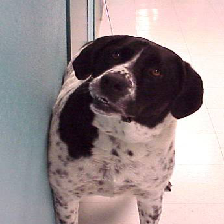

I think this is a cat


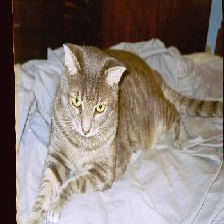

I thought this is a dog


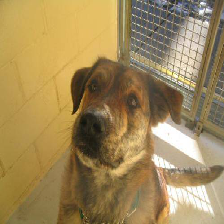

I think this is a cat


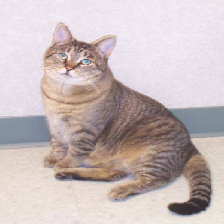

I think this is a cat


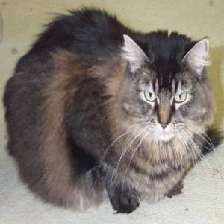

In [167]:
for predict,img in zip(medium_predictions[:5] ,imgs_normal[:5,:,:]):
    if (predict <.5):
        print('I think this is a cat')
        display(array_to_img(img))
    else:
        print("I thought this is a dog")
        display(array_to_img(img))


I thought this was a cat but this is a dog!


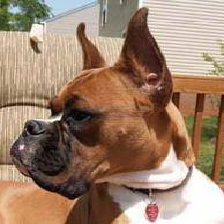

I thought this was a cat but this is a dog!


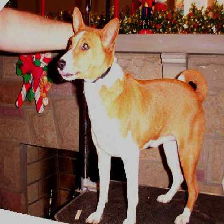

I thought this was a dog but it is a cat!


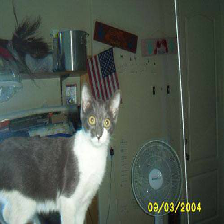

I thought this was a cat but this is a dog!


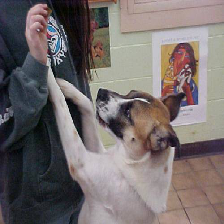

In [166]:
for predict,img,y_score in zip(medium_predictions ,imgs_normal,y):
    if (predict <.5) & (y_score==1):
        print('I thought this was a cat but this is a dog!')
        display(array_to_img(img))
    elif (predict >=.5) & (y_score==0):
        print("I thought this was a dog but it is a cat!")
        display(array_to_img(img))
    else:
        pass

In [162]:
model_mediumtuning.evaluate(x=imgs_preprocessed[:100,:,:],y=y[:100])

100/100 [==============================] - 103s    


[0.039054072629660368, 0.97999999999999998]

In [ ]:
# 98% accuracy

# Bonus Activities

---

# Error Analysis

Now that we have a reasonably performing image classifier, what's next? A good idea is to perform *error analysis* to systemtically discover which types of errors your model is making the most.

## Task

- Make predictions on the first 128 images

## Hint

- Recall that cats have labels of `0`, while dogs have labels of `1`

## Admission

- In a real-world setting you would make predictions on a held-out test set. However, we have not gone through the trouble of creating one and hence using the training set will do this one time.

## Task

- Display five images which your model made the correct prediction

## Task

- Display five images which your model made an incorrect prediction

I thought this was a cat but this is a dog! My prediction was [[ 0.12654421]]


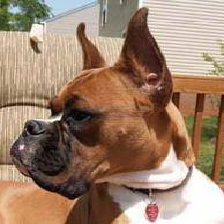

I thought this was a cat but this is a dog! My prediction was [[ 0.48625833]]


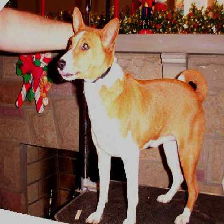

I thought this was a dog but it is a cat! My prediction was [[ 0.69188792]]


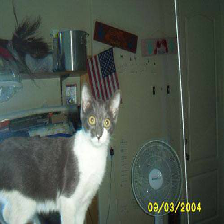

I thought this was a cat but this is a dog! My prediction was [[ 0.1701818]]


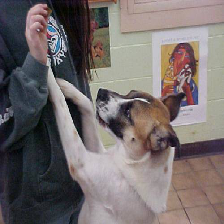

I thought this was a dog but it is a cat! My prediction was [[ 0.52899677]]


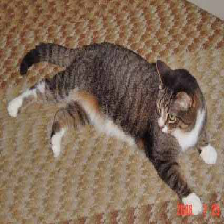

I thought this was a cat but this is a dog! My prediction was [[ 0.29071394]]


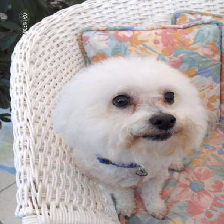

I thought this was a cat but this is a dog! My prediction was [[ 0.01760466]]


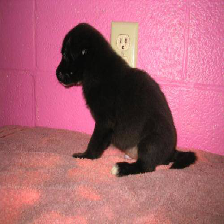

In [171]:
for predict,img,y_score in zip(medium_predictions ,imgs_normal,y):
    if (predict <.5) & (y_score==1):
        print('I thought this was a cat but this is a dog! My prediction was {}'.format(predict))
        display(array_to_img(img))
    elif (predict >=.5) & (y_score==0):
        print("I thought this was a dog but it is a cat! My prediction was {}".format(predict))
        display(array_to_img(img))
    else:
        pass

## Task

- Display the top five cat images that your model is very sure contains a cat along with its confidence for each image

## Task

- Display the top five cat images that your model is very sure contains a dog along with its confidence for each image

## Task

- Display the top five images which confuse your model the most along with its confidence for each image